In [2]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import tensorflow as tf

In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

In [4]:
modelConv = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, kernel_size=(3,3), padding='same', activation=tf.nn.relu, input_shape=(28, 28, 1)),
  tf.keras.layers.Conv2D(32, kernel_size=(3,3), padding='same', activation=tf.nn.relu),
  tf.keras.layers.MaxPool2D(pool_size=(2,2)),
  tf.keras.layers.Conv2D(64, kernel_size=(3,3), padding='same', activation=tf.nn.relu),
  tf.keras.layers.Conv2D(64, kernel_size=(3,3), padding='same', activation=tf.nn.relu),
  tf.keras.layers.MaxPool2D(pool_size=(2,2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
modelConv.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
modelConv.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 116s 2ms/step - loss: 0.1135 - acc: 0.9654 - val_loss: 0.0419 - val_acc: 0.9869
Epoch 2/10
60000/60000 [==============================] - 112s 2ms/step - loss: 0.0399 - acc: 0.9882 - val_loss: 0.0256 - val_acc: 0.9919
Epoch 3/10
60000/60000 [==============================] - 113s 2ms/step - loss: 0.0289 - acc: 0.9910 - val_loss: 0.0377 - val_acc: 0.9889
Epoch 4/10
60000/60000 [==============================] - 109s 2ms/step - loss: 0.0234 - acc: 0.9926 - val_loss: 0.0233 - val_acc: 0.9924
Epoch 5/10
60000/60000 [==============================] - 118s 2ms/step - loss: 0.0183 - acc: 0.9943 - val_loss: 0.0375 - val_acc: 0.9891
Epoch 6/10
60000/60000 [==============================] - 109s 2ms/step - loss: 0.0149 - acc: 0.9954 - val_loss: 0.0258 - val_acc: 0.9927
Epoch 7/10
60000/60000 [==============================] - 107s 2ms/step - loss: 0.0120 - acc: 0.9964 - val_loss: 0.0254 - 

In [5]:
modelConv.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
__________

In [7]:
for layer in modelConv.layers:
    print(layer)

In [8]:
modelConv.layers[0].get_weights()

[array([[[[-5.86798750e-02, -4.56847884e-02, -2.48505790e-02,
            3.74726504e-02,  8.81138742e-02,  3.36327702e-02,
            3.24214362e-02,  1.32590132e-02,  6.89976364e-02,
           -9.11357030e-02, -1.50175259e-01, -1.87121958e-01,
            6.70007542e-02, -1.57662138e-01, -7.06121102e-02,
           -9.52975750e-02,  5.26053309e-02, -2.28732720e-01,
            1.73004642e-01, -1.16709284e-02,  1.60297275e-01,
           -2.28791311e-01,  7.78510720e-02, -2.99501978e-02,
           -2.31347039e-01,  3.65919173e-02,  3.99906300e-02,
            7.60188028e-02, -1.23884037e-01,  8.17663819e-02,
           -6.16738945e-02,  6.99731782e-02]],
 
         [[-3.42298634e-02, -3.42124291e-02, -2.78331041e-01,
           -1.70890093e-01,  5.28028272e-02, -8.29567481e-03,
            2.13584919e-02, -1.93645626e-01,  1.44412443e-01,
            9.24872383e-02, -2.92384438e-02, -1.81332111e-01,
            1.31638832e-02, -4.75574620e-02, -7.15555176e-02,
            5.9344146

In [11]:
modelConv.save('mnist_conv.h5')

In [5]:
modelConv = tf.keras.models.load_model('mnist_conv.h5')

In [6]:
modelConv.layers[0].get_weights()[0]

array([[[[-5.86798750e-02, -4.56847884e-02, -2.48505790e-02,
           3.74726504e-02,  8.81138742e-02,  3.36327702e-02,
           3.24214362e-02,  1.32590132e-02,  6.89976364e-02,
          -9.11357030e-02, -1.50175259e-01, -1.87121958e-01,
           6.70007542e-02, -1.57662138e-01, -7.06121102e-02,
          -9.52975750e-02,  5.26053309e-02, -2.28732720e-01,
           1.73004642e-01, -1.16709284e-02,  1.60297275e-01,
          -2.28791311e-01,  7.78510720e-02, -2.99501978e-02,
          -2.31347039e-01,  3.65919173e-02,  3.99906300e-02,
           7.60188028e-02, -1.23884037e-01,  8.17663819e-02,
          -6.16738945e-02,  6.99731782e-02]],

        [[-3.42298634e-02, -3.42124291e-02, -2.78331041e-01,
          -1.70890093e-01,  5.28028272e-02, -8.29567481e-03,
           2.13584919e-02, -1.93645626e-01,  1.44412443e-01,
           9.24872383e-02, -2.92384438e-02, -1.81332111e-01,
           1.31638832e-02, -4.75574620e-02, -7.15555176e-02,
           5.93441464e-02, -1.84724499

In [7]:
modelConv.layers[0].get_weights()[0].shape

(3, 3, 1, 32)

In [8]:
weights = np.moveaxis(modelConv.layers[0].get_weights()[0], -1, 0)
weights

array([[[[-5.86798750e-02],
         [-3.42298634e-02],
         [-1.85495783e-02]],

        [[-1.14130834e-02],
         [ 9.50164124e-02],
         [-1.20300017e-01]],

        [[-1.46683231e-01],
         [ 3.71369049e-02],
         [-1.17565505e-01]]],


       [[[-4.56847884e-02],
         [-3.42124291e-02],
         [-9.84550565e-02]],

        [[ 1.36033759e-01],
         [-1.29522279e-01],
         [-2.50731945e-01]],

        [[ 1.57759950e-01],
         [ 1.80627212e-01],
         [-6.63619712e-02]]],


       [[[-2.48505790e-02],
         [-2.78331041e-01],
         [-1.30089149e-01]],

        [[-5.89454770e-02],
         [-2.25917529e-02],
         [ 2.70214021e-01]],

        [[-1.38933631e-02],
         [-1.37351781e-01],
         [-2.67918944e-01]]],


       [[[ 3.74726504e-02],
         [-1.70890093e-01],
         [-8.97729546e-02]],

        [[ 1.51652187e-01],
         [ 7.36562163e-02],
         [-9.39294347e-04]],

        [[-1.82756901e-01],
         [-1.0561761

In [9]:
weights.shape

(32, 3, 3, 1)

In [10]:
weights = np.squeeze(weights)
weights

array([[[-5.86798750e-02, -3.42298634e-02, -1.85495783e-02],
        [-1.14130834e-02,  9.50164124e-02, -1.20300017e-01],
        [-1.46683231e-01,  3.71369049e-02, -1.17565505e-01]],

       [[-4.56847884e-02, -3.42124291e-02, -9.84550565e-02],
        [ 1.36033759e-01, -1.29522279e-01, -2.50731945e-01],
        [ 1.57759950e-01,  1.80627212e-01, -6.63619712e-02]],

       [[-2.48505790e-02, -2.78331041e-01, -1.30089149e-01],
        [-5.89454770e-02, -2.25917529e-02,  2.70214021e-01],
        [-1.38933631e-02, -1.37351781e-01, -2.67918944e-01]],

       [[ 3.74726504e-02, -1.70890093e-01, -8.97729546e-02],
        [ 1.51652187e-01,  7.36562163e-02, -9.39294347e-04],
        [-1.82756901e-01, -1.05617613e-01, -1.06536541e-02]],

       [[ 8.81138742e-02,  5.28028272e-02,  7.17267720e-03],
        [-1.92730546e-01, -1.48622598e-02,  1.30919367e-01],
        [-1.97497487e-01, -1.33130357e-01,  1.32466763e-01]],

       [[ 3.36327702e-02, -8.29567481e-03,  1.87843069e-01],
        [-3.88

In [11]:
weights.shape

(32, 3, 3)

In [20]:
def make_mosaic(imgs, nrows, ncols, border=1):
    """
    Given a set of images with all the same shape, makes a
    mosaic with nrows and ncols
    """
    nimgs = imgs.shape[0]
    imshape = imgs.shape[1:]
    
    mosaic = np.ma.masked_all((nrows * imshape[0] + (nrows - 1) * border,
                            ncols * imshape[1] + (ncols - 1) * border),
                            dtype=np.float32)
    
    paddedh = imshape[0] + border
    paddedw = imshape[1] + border
    for i in range(nimgs):
        row = int(np.floor(i / ncols))
        col = i % ncols
        
        mosaic[row * paddedh:row * paddedh + imshape[0],
               col * paddedw:col * paddedw + imshape[1]] = imgs[i]
    return mosaic

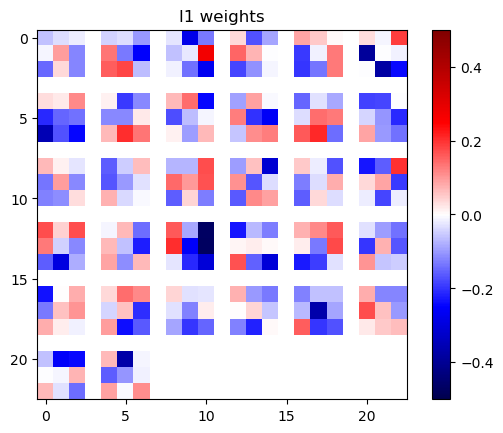

In [58]:
plt.style.use('default')
#plt.figure(figsize=(10,10))
plt.title('l1 weights')
plt.colorbar(plt.imshow(make_mosaic(weights, 6, 6), vmin=-0.5, vmax=0.5, cmap=plt.cm.seismic))

(1, 32, 3, 3)
(32, 3, 3)


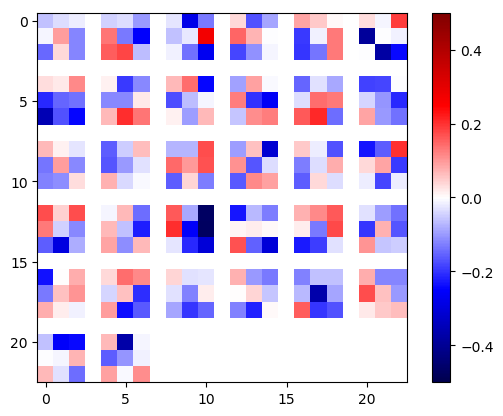

In [80]:
def weight_plot(weights):
    weights = np.moveaxis(weights, -1, 0)
    weights = np.moveaxis(weights, -1, 0)
    print(weights.shape)
    for w in weights:
        print(w.shape)
        plt.colorbar(plt.imshow(make_mosaic(w, 6, 6), vmin=-0.5, vmax=0.5, cmap=plt.cm.seismic))
        plt.show()
weight_plot(modelConv.layers[0].get_weights()[0])

(32, 32, 3, 3)
(32, 3, 3)


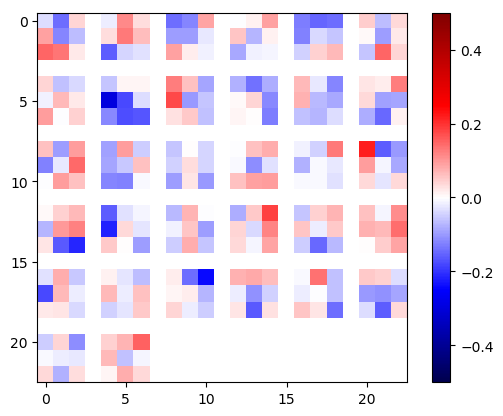

(32, 3, 3)


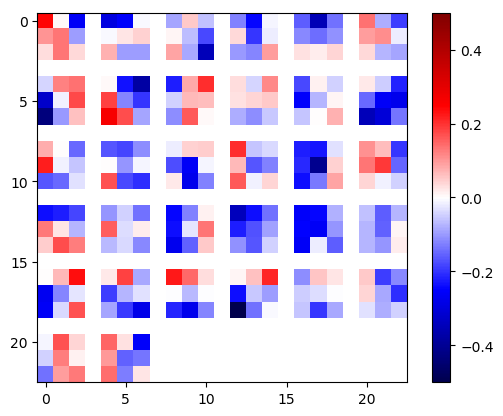

(32, 3, 3)


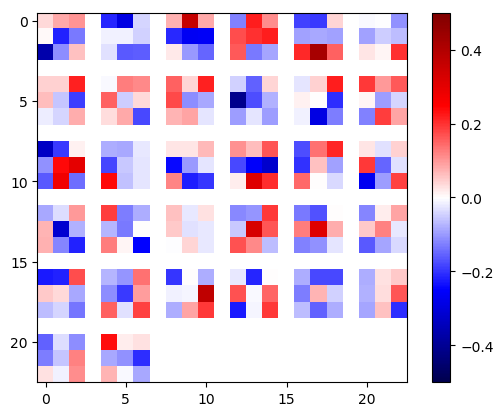

(32, 3, 3)


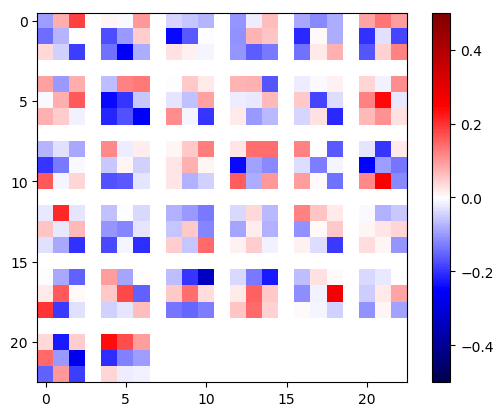

(32, 3, 3)


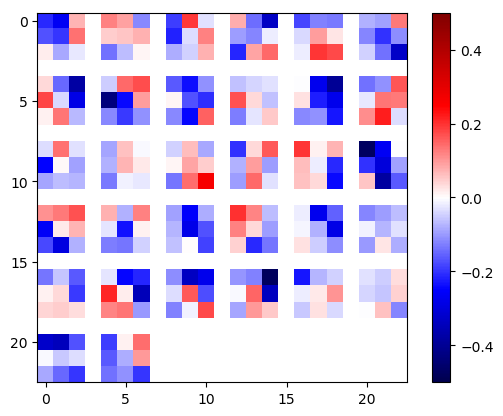

(32, 3, 3)


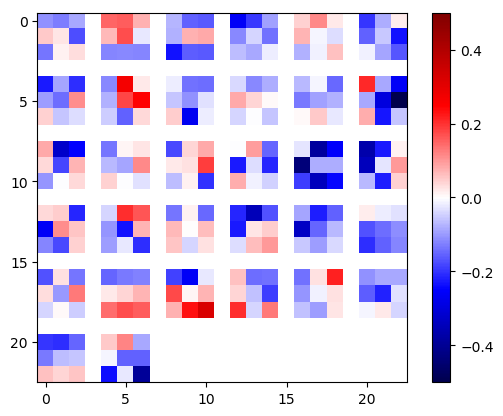

(32, 3, 3)


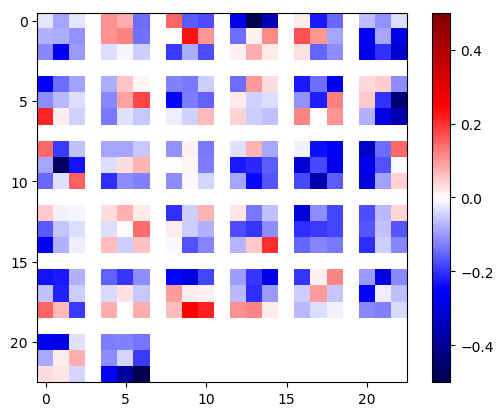

(32, 3, 3)


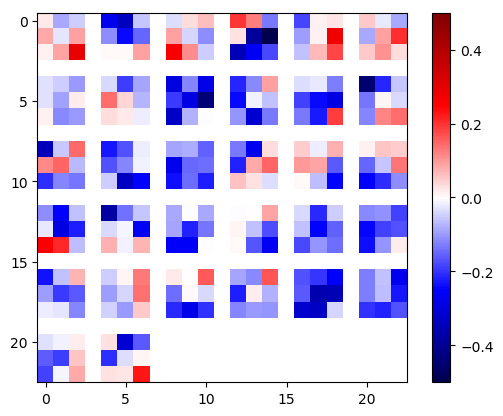

(32, 3, 3)


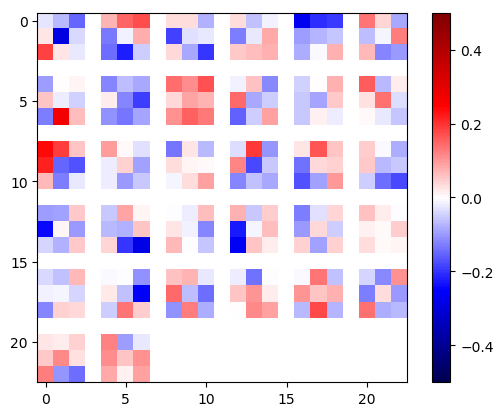

(32, 3, 3)


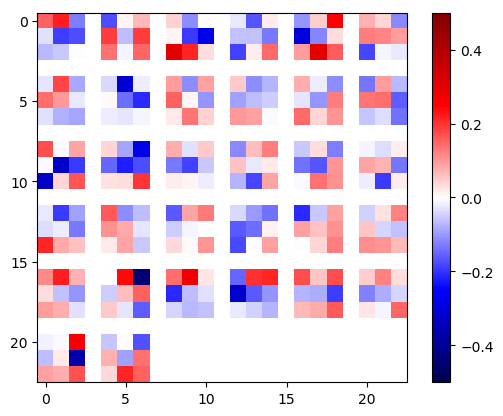

(32, 3, 3)


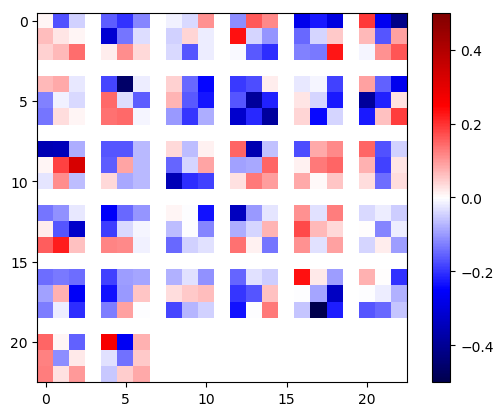

(32, 3, 3)


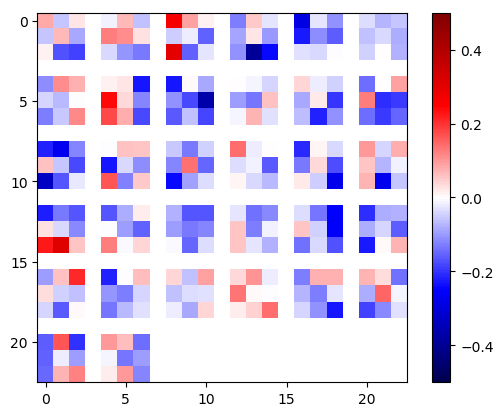

(32, 3, 3)


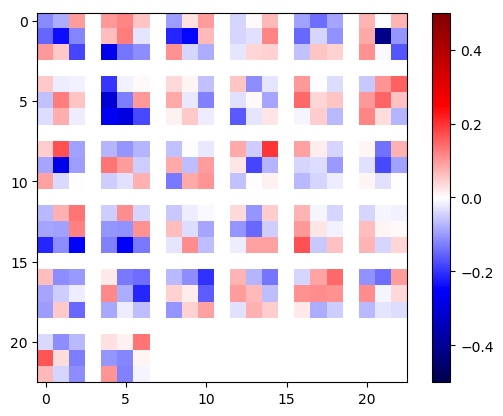

(32, 3, 3)


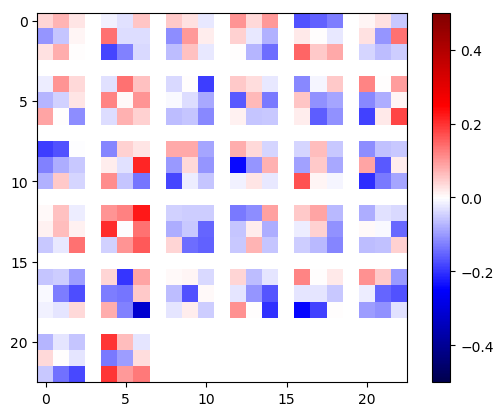

(32, 3, 3)


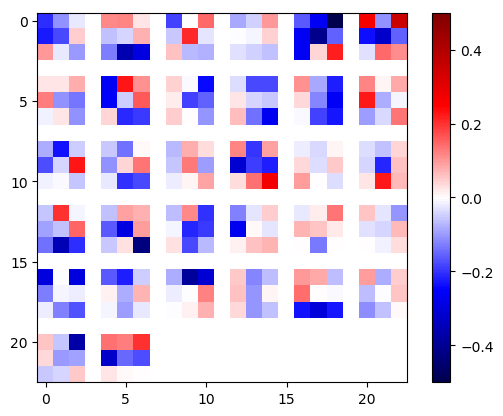

(32, 3, 3)


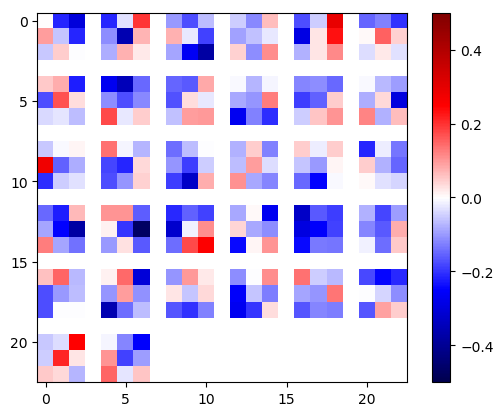

(32, 3, 3)


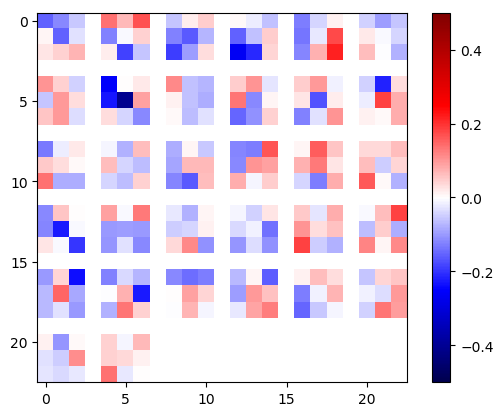

(32, 3, 3)


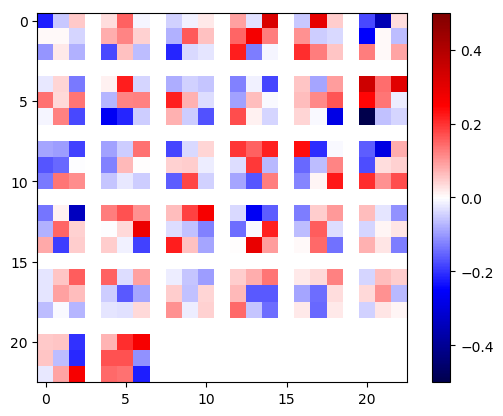

(32, 3, 3)


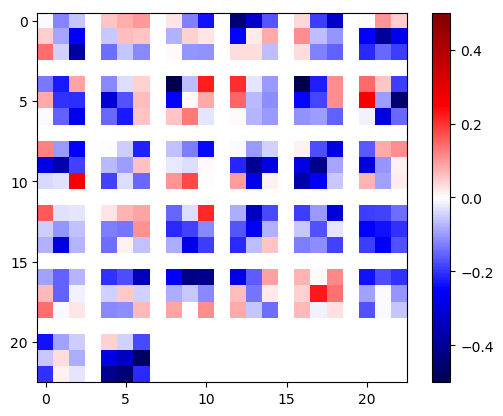

(32, 3, 3)


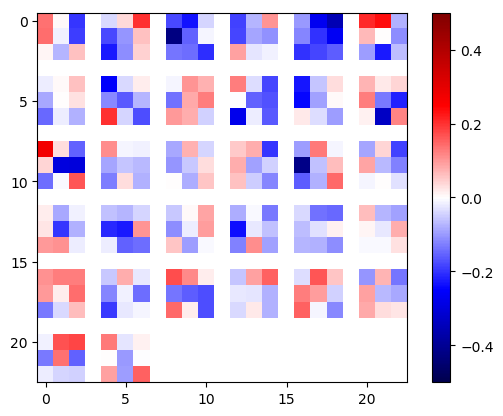

(32, 3, 3)


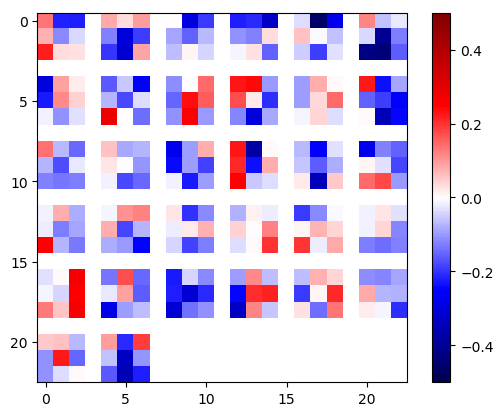

(32, 3, 3)


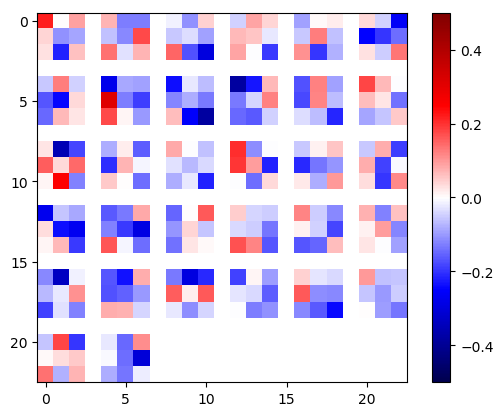

(32, 3, 3)


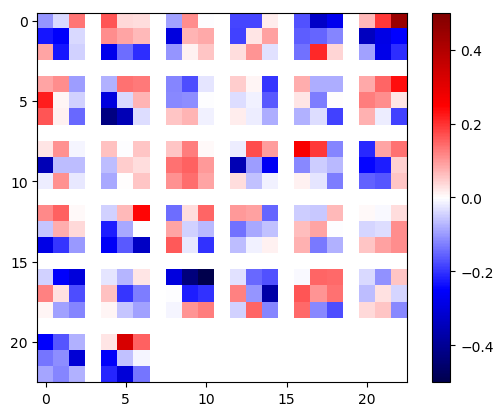

(32, 3, 3)


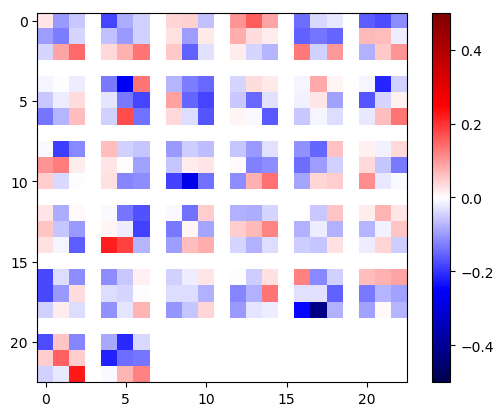

(32, 3, 3)


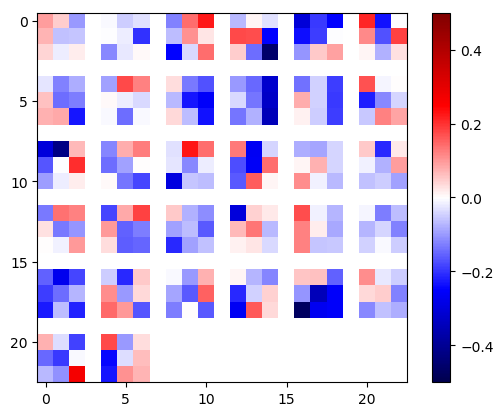

(32, 3, 3)


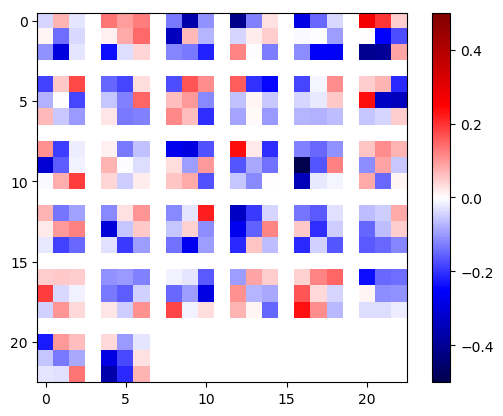

(32, 3, 3)


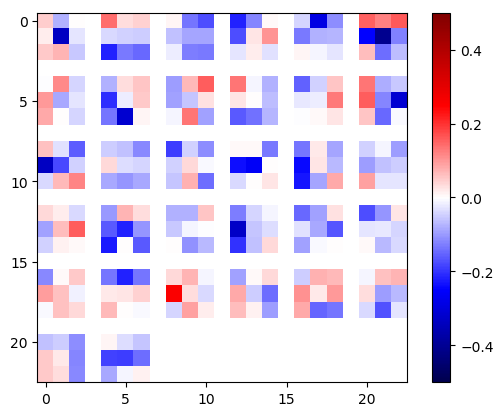

(32, 3, 3)


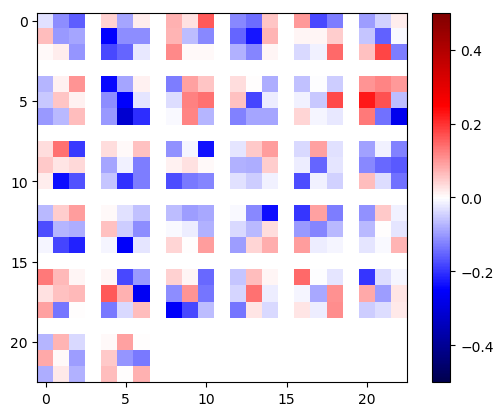

(32, 3, 3)


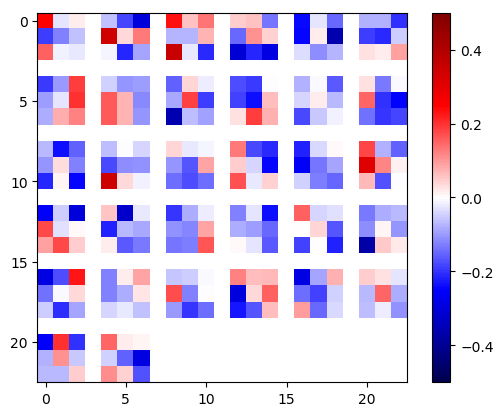

(32, 3, 3)


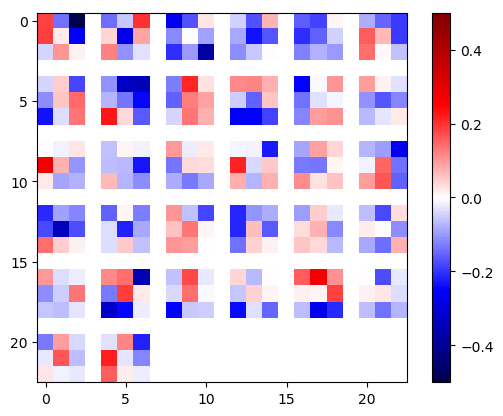

(32, 3, 3)


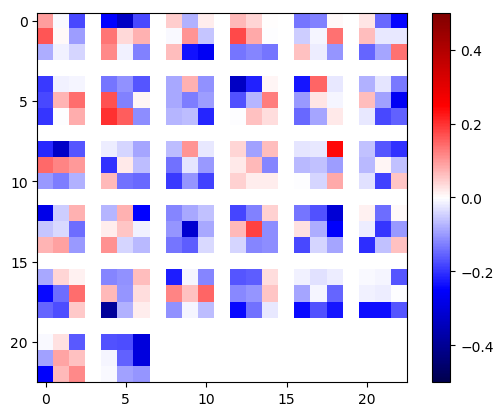

(32, 3, 3)


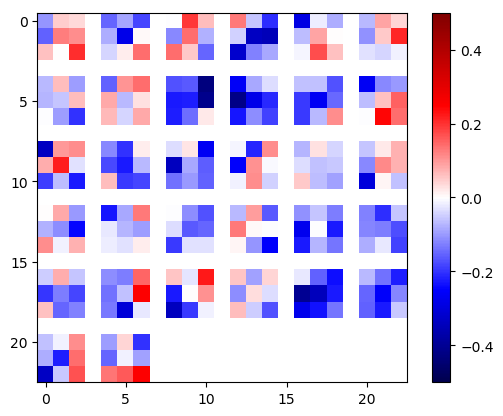

In [81]:
weight_plot(modelConv.layers[1].get_weights()[0])